In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# Importation des données

In [2]:
billets = pd.read_csv('billets.csv', sep=";", decimal='.')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
billets.loc[billets['is_genuine'] == True, 'Vrai'] = 1
billets.loc[billets['is_genuine'] == False, 'Vrai'] = 0

billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Vrai
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1.0
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1.0
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1.0
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1.0
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1.0


# Exploration des données

In [4]:
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
Vrai             0
dtype: int64

In [6]:
is_null = billets.loc[billets['margin_low'].isnull()]
is_null.tail(15)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Vrai
845,True,172.02,104.21,104.05,NaN,2.90,113.62,1.0
871,True,171.37,104.07,103.75,NaN,3.07,113.27,1.0
895,True,171.81,103.68,103.80,NaN,2.98,113.82,1.0
919,True,171.92,103.68,103.45,NaN,2.58,113.68,1.0
945,True,172.09,103.74,103.52,NaN,3.02,112.78,1.0
946,True,171.63,103.87,104.66,NaN,3.27,112.68,1.0
981,True,172.02,104.23,103.72,NaN,2.99,113.37,1.0
1076,False,171.57,104.27,104.44,NaN,3.21,111.87,0.0
1121,False,171.40,104.38,104.19,NaN,3.17,112.39,0.0
1176,False,171.59,104.05,103.94,NaN,3.02,111.29,0.0


In [195]:
billets.shape

(1500, 8)

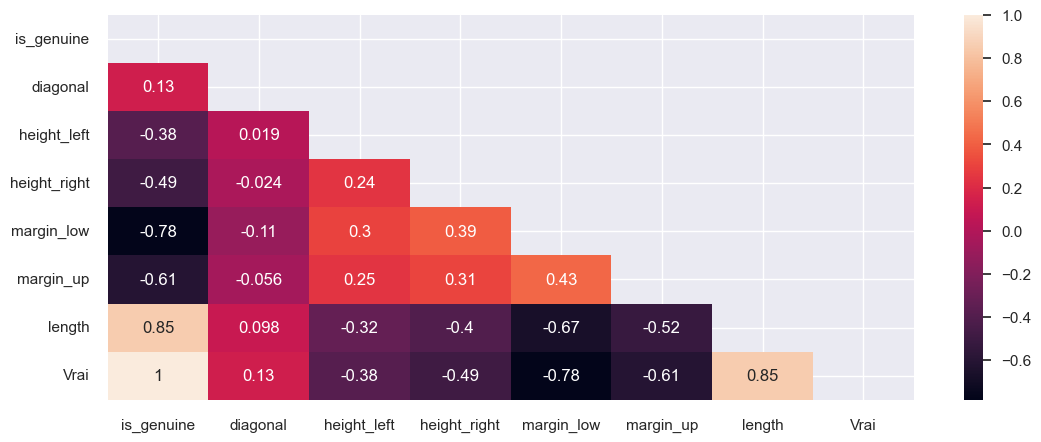

In [196]:
# Calculate pairwise-correlation
matrix = billets.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True)
plt.show()

# Régression linéaire : Valeurs manquantes

In [197]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv('billets.csv', sep=";", decimal='.')

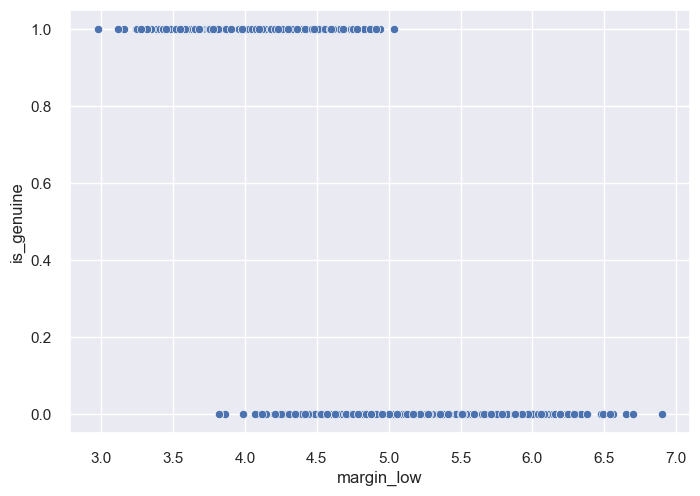

In [198]:
sns.set()

ax = sns.scatterplot(x="margin_low", y="is_genuine", data=data)

In [199]:
#Diviser les données en ensembles d'entraînement et de prédiction
train_data = data.dropna()
predict_data = data[data.isnull().any(axis=1)]

#Séparer les fonctionnalités et les valeurs cibles pour l'entraînement du modèle
X_train = train_data.drop('margin_low', axis=1)
y_train = train_data['margin_low']

# Entrainement du modèles
model = LinearRegression()
model.fit(X_train, y_train)

# Préduction des valeurs manquantes
X_predict = predict_data.drop('margin_low', axis=1)
predicted_values = model.predict(X_predict)

# Remplacement des valeurs
data.loc[data.isnull().any(axis=1), 'margin_low'] = predicted_values

data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [200]:
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

# Analyse descriptive des données

<Axes: xlabel='is_genuine', ylabel='length'>

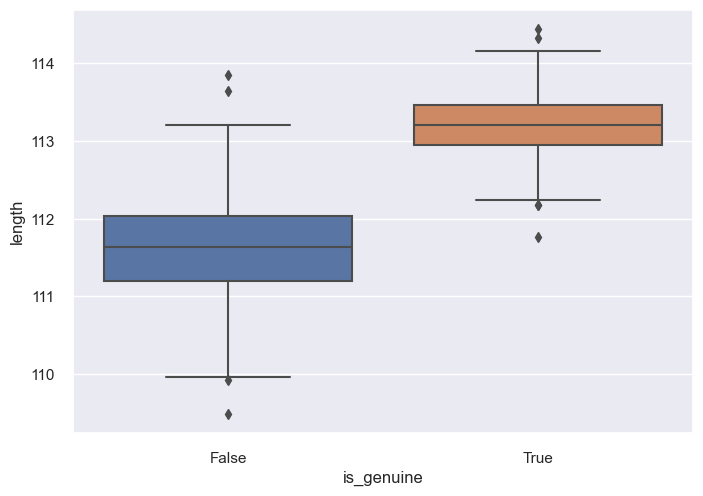

In [201]:
sns.boxplot( x=data["is_genuine"], y=data["length"] )

<Axes: xlabel='is_genuine', ylabel='diagonal'>

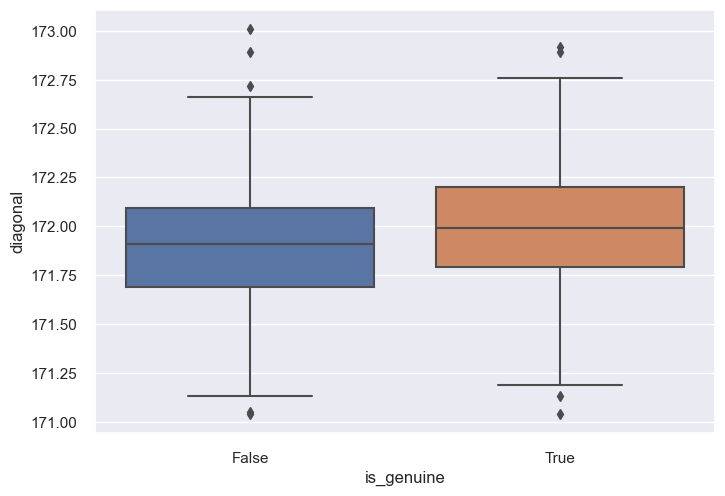

In [202]:
sns.boxplot( x=data["is_genuine"], y=data["diagonal"] )

<Axes: xlabel='is_genuine', ylabel='height_left'>

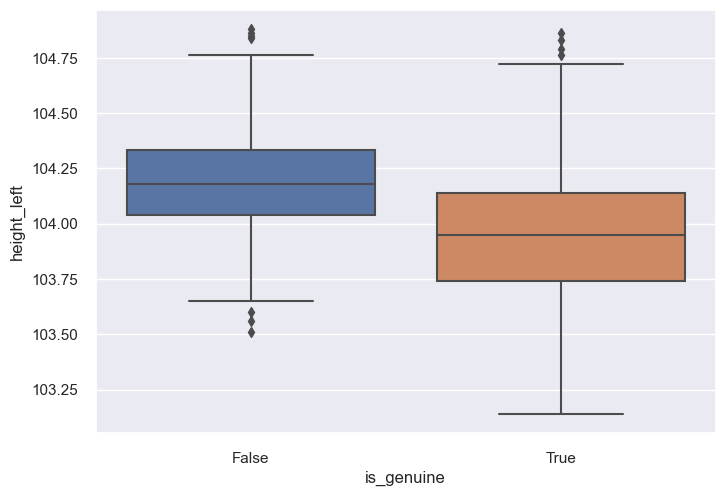

In [203]:
sns.boxplot( x=data["is_genuine"], y=data["height_left"] )

<Axes: xlabel='is_genuine', ylabel='height_right'>

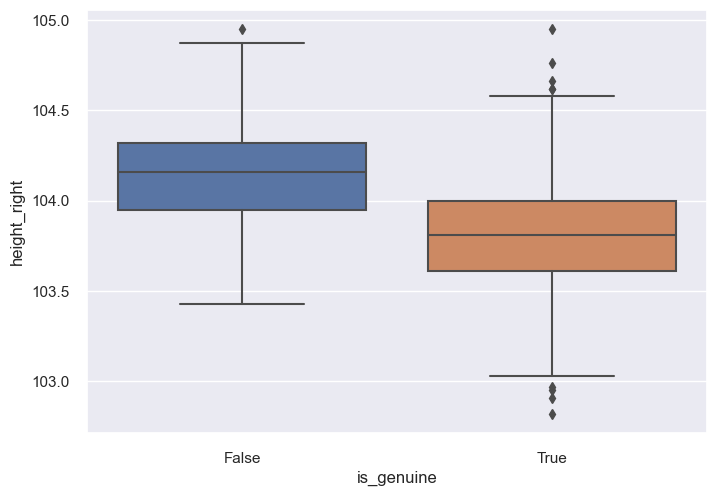

In [204]:
sns.boxplot( x=data["is_genuine"], y=data["height_right"] )

<Axes: xlabel='is_genuine', ylabel='margin_low'>

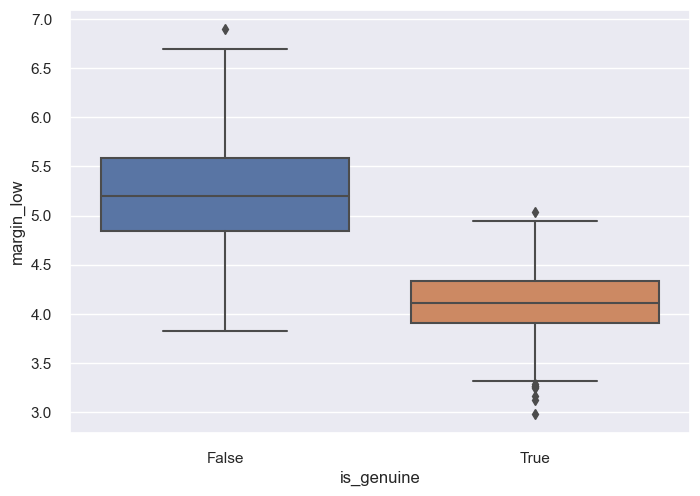

In [205]:
sns.boxplot( x=data["is_genuine"], y=data["margin_low"] )

<Axes: xlabel='is_genuine', ylabel='margin_up'>

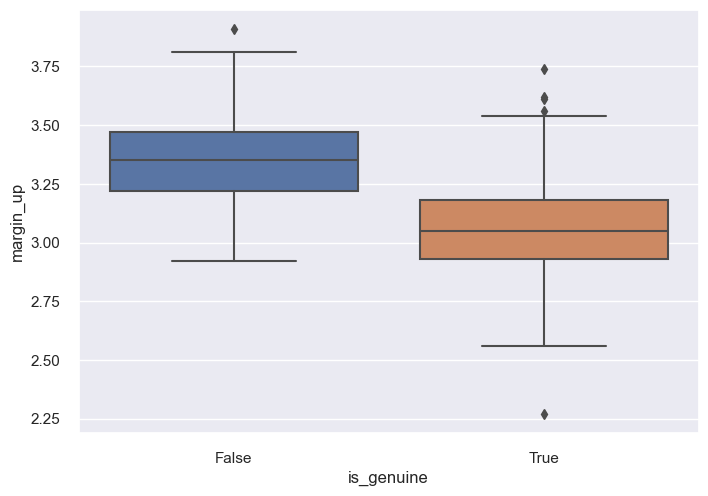

In [206]:
sns.boxplot( x=data["is_genuine"], y=data["margin_up"] )

# Modèle de prédiction : Régression Logistique

In [207]:
data.loc[data['is_genuine'] == True, 'Vrai'] = 1
data.loc[data['is_genuine'] == False, 'Vrai'] = 0

data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Vrai
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1.0
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1.0
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1.0
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1.0
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1.0


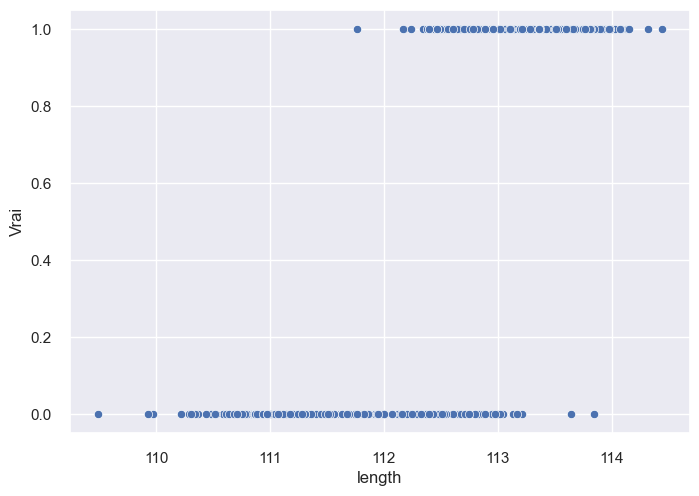

In [208]:
sns.set()

ax = sns.scatterplot(x="length", y="Vrai", data=data)

In [209]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [210]:
x.drop(columns=['is_genuine'], inplace = True) #Enlever la colonne Is_geniune
x.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [211]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Vrai, dtype: float64

### Entrainement du modèle de prédiction sur un échantillon test

In [212]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

print(x_train.shape)
print(x_test.shape)

(1050, 6)
(450, 6)


In [213]:
#Création du modèle

model = LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

In [214]:
#test model
predicts = model.predict(x_test)

In [215]:
#evalution du model
print(classification_report(y_test,predicts))
print("Taux de réussite :",accuracy_score(y_test, predicts).round(2)*100,"%")

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       161
         1.0       0.98      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.99       450
weighted avg       0.99      0.99      0.99       450

Taux de réussite : 99.0 %


In [216]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test, y_pred=predicts)
print(matrix)

[[156   5]
 [  1 288]]


In [217]:
import numpy as np
import matplotlib.pyplot as plt
import itertools


def plot_confusion_matrix(cm, classes, title='Matrice de confusion', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    ax = plt.gca()
    ax.grid(False)

    plt.ylabel('Valeurs réelles')
    plt.xlabel('Valeurs prédites')
    plt.tight_layout()

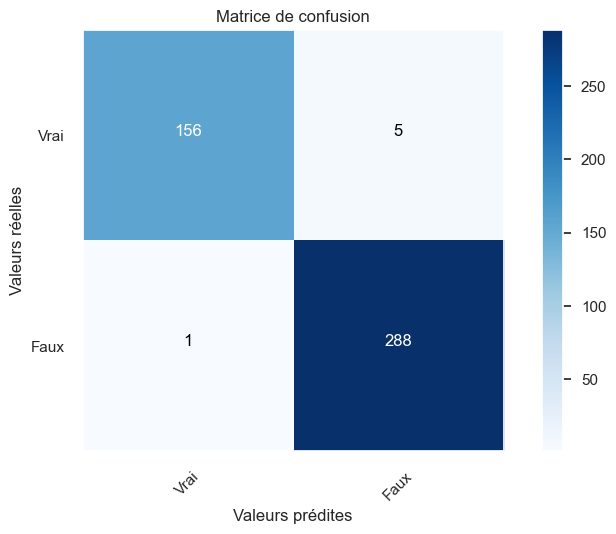

In [218]:
classes = ['Vrai', 'Faux']

plot_confusion_matrix(matrix, classes)

### Utilisation du modèle sur toutes les données 

In [219]:
#Prédiction sur toutes les données

In [220]:
predicts = model.predict(x)
print(predicts)

[0. 1. 1. ... 0. 0. 0.]


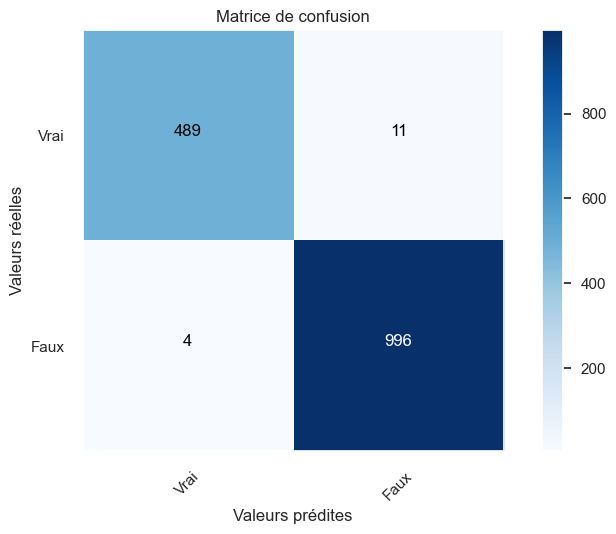

In [221]:
matrix = confusion_matrix(y_true=y, y_pred=predicts)
plot_confusion_matrix(matrix, classes)

# Modèle de prédiction : K-means

In [222]:
vrai = data['Vrai']
zone = data['is_genuine']

In [223]:
kmeans_data = data

kmeans_data.drop(columns = ['is_genuine','Vrai'], inplace = True)

In [224]:
x = kmeans_data.values
features = kmeans_data.columns

kmeans_data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [225]:
#Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

df_X = pd.DataFrame(X_scaled)
df_X.columns = features
df_X.index = zone

df_X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
True,-0.486540,2.774123,3.163240,0.056324,-1.128325,0.173651
True,-1.633729,-2.236535,-0.799668,-1.080592,-0.696799,0.471666
True,2.397823,1.504756,-1.291191,-0.125583,-0.912562,0.551901
True,-1.961498,-0.399294,0.060498,-1.307975,-0.610494,0.953075
True,-0.748754,0.836669,-1.414072,-0.671303,1.417677,-0.158750


## Choix du nb de cluster 

In [226]:
from sklearn.cluster import KMeans

In [227]:
k = 2

# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

In [228]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

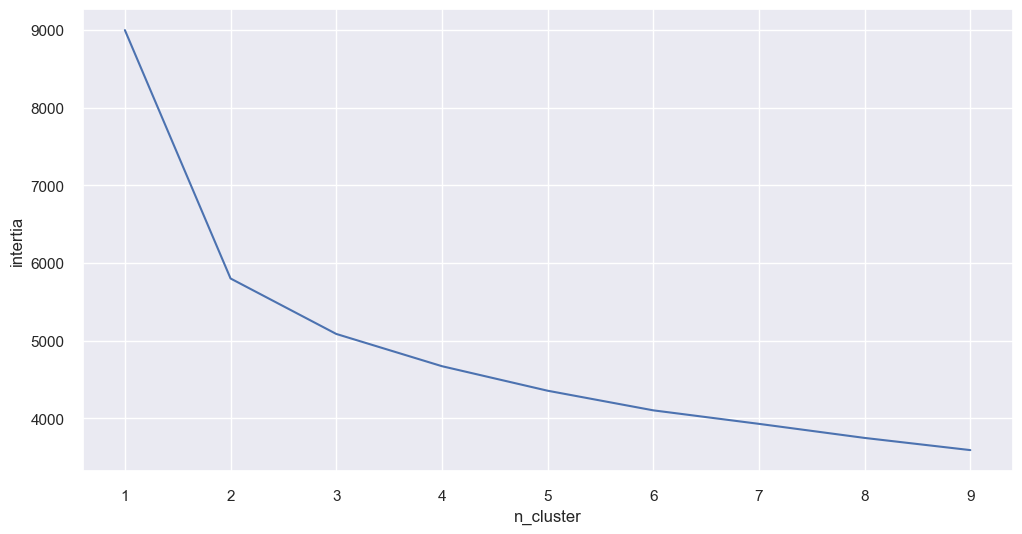

In [229]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

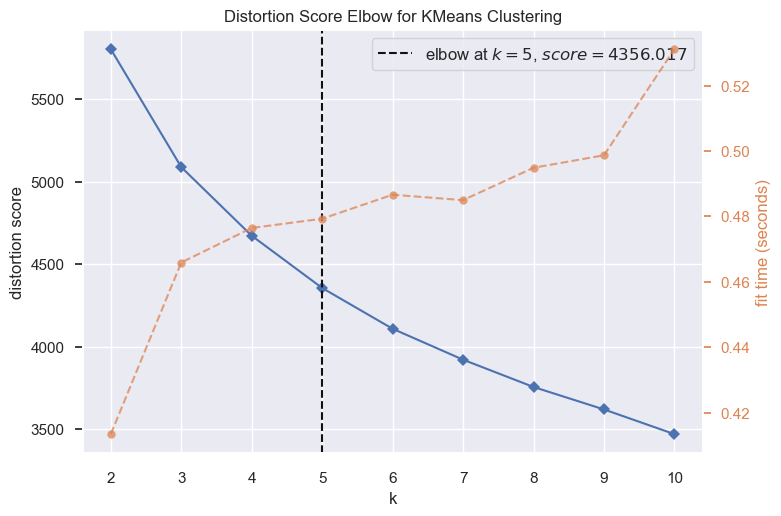

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [230]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Modèle : Kmeans : Echantillons test

In [231]:
#Normalisation des données
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [232]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [233]:
model = KMeans(n_clusters = 2, random_state = 0)

model.fit(x_train,y_train)

pred = model.predict(x_test)

In [234]:
matrix = confusion_matrix(y_true=y_test, y_pred=pred)
matrix

array([[153,   4],
       [  4, 289]], dtype=int64)

In [235]:
classes = ['Faux', 'Vrai']

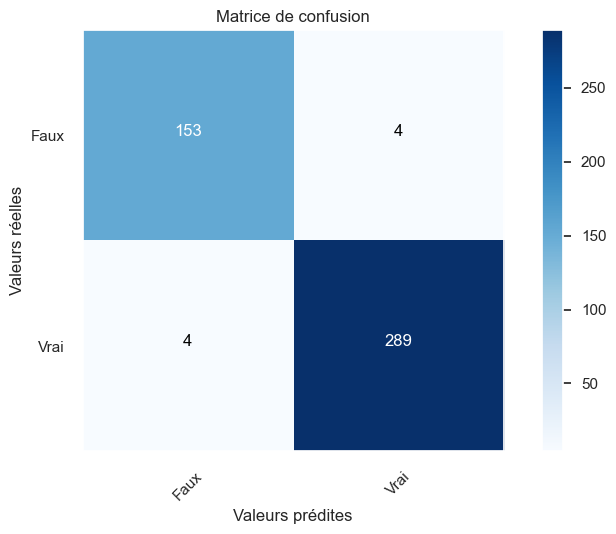

In [236]:
plot_confusion_matrix(matrix, classes)

In [237]:
print("Taux de réussite :",accuracy_score(y_test, pred).round(2)*100,"%")

Taux de réussite : 98.0 %


## Modèle : Kmeans : Echantillons entier

In [238]:
pred = model.predict(x)

In [239]:
matrix = confusion_matrix(y_true=y, y_pred=pred)
matrix

array([[486,  14],
       [ 10, 990]], dtype=int64)

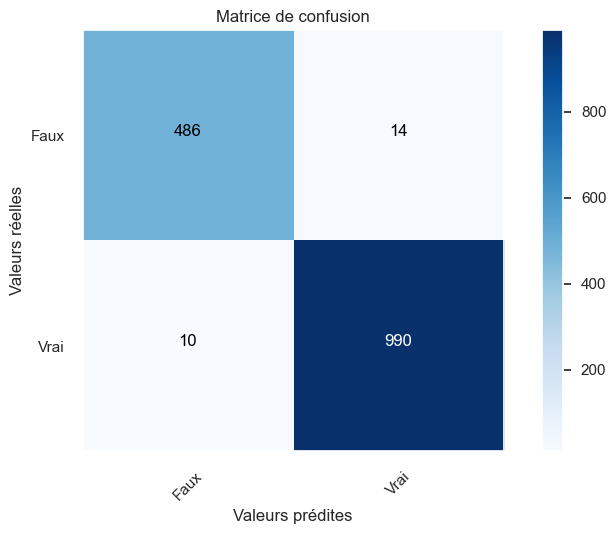

In [240]:
plot_confusion_matrix(matrix, classes)

In [241]:
print("Taux de réussite :",accuracy_score(y, pred).round(2)*100,"%")

Taux de réussite : 98.0 %


In [242]:
centers = pd.DataFrame(model.cluster_centers_) # Récupérer les centres pour les afficher
centers

,0,1,2,3,4,5
0,-0.224421,0.569828,0.706439,1.124688,0.834672,-1.194230
1,0.066979,-0.277892,-0.352172,-0.552285,-0.423803,0.585465


In [243]:
centers.columns = features
centers.index = ['Faux','Vrai']
centers

,diagonal,height_left,height_right,margin_low,margin_up,length
Faux,-0.224421,0.569828,0.706439,1.124688,0.834672,-1.194230
Vrai,0.066979,-0.277892,-0.352172,-0.552285,-0.423803,0.585465
